<a href="https://colab.research.google.com/github/nagmafarez/IDS-Assignment/blob/main/SLR_%26_MLR_for_concrete_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
df = pd.read_csv("concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Performing EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
#Check for missing values
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [5]:
#Summerizing the data
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Scaling Numerical Features

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [16]:
# Select the features (all columns except the target 'Strength')
X = df.drop('Strength', axis=1)

In [17]:
# Standardize the data
X_scaled = scaler.fit_transform(X)

In [18]:
# Convert back to a DataFrame with column names for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [19]:
# Include the target column 'Strength' for complete dataset
data_scaled = pd.concat([X_scaled_df, df['Strength']], axis=1)

In [20]:
# Display the scaled dataset
print(data_scaled.head())

     Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
0  2.477915           -0.856888 -0.847144 -0.916764         -0.620448   
1  2.477915           -0.856888 -0.847144 -0.916764         -0.620448   
2  0.491425            0.795526 -0.847144  2.175461         -1.039143   
3  0.491425            0.795526 -0.847144  2.175461         -1.039143   
4 -0.790459            0.678408 -0.847144  0.488793         -1.039143   

   Coarse Aggregate  Fine Aggregate       Age  Strength  
0          0.863154       -1.217670 -0.279733     79.99  
1          1.056164       -1.217670 -0.279733     61.89  
2         -0.526517       -2.240917  3.553066     40.27  
3         -0.526517       -2.240917  5.057677     41.05  
4          0.070527        0.647884  4.978487     44.30  


In [21]:
# Rename columns to remove spaces
df.columns = df.columns.str.replace(' ', '_')

In [22]:
# Display the updated column names to verify
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength'],
      dtype='object')

# Correlation Matrix

In [23]:
df.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast_Furnace_Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly_Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse_Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine_Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


# Scatter Plot between variables along with Histograms

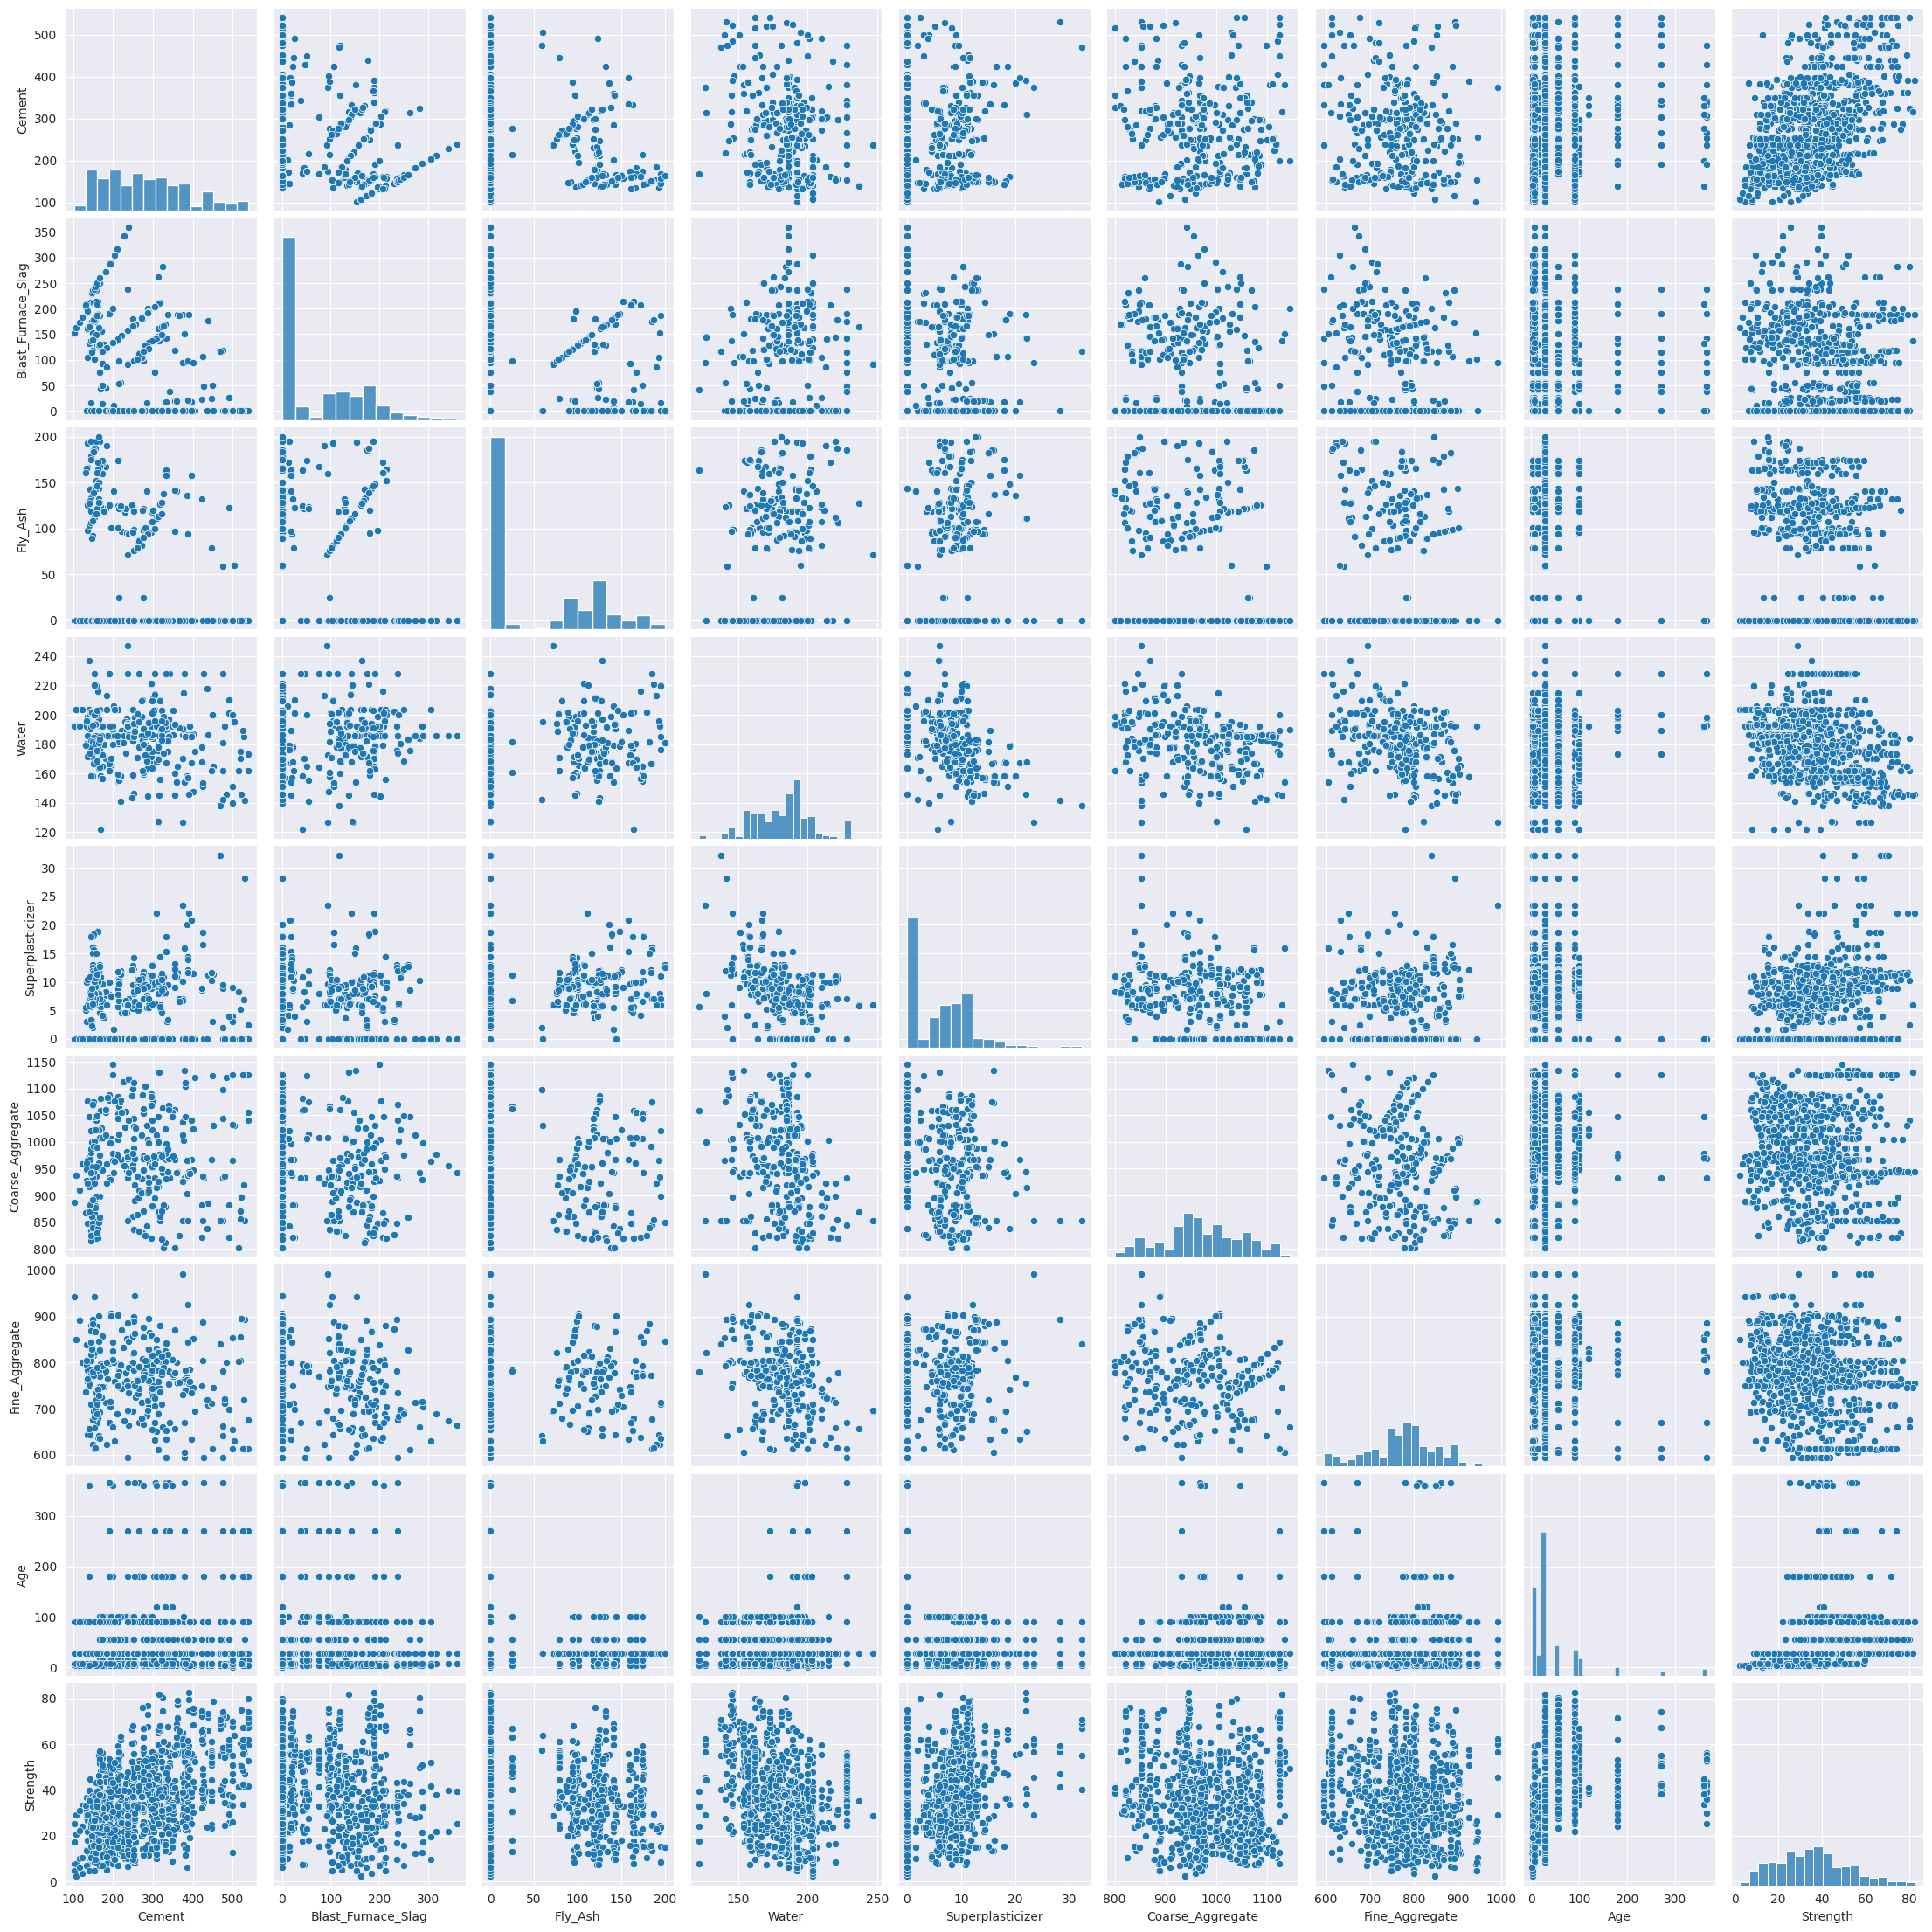

In [24]:
# Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Preparing a Model

In [34]:
#Build a Model
import statsmodels.formula.api as smf
model = smf.ols('Strength~Cement+Superplasticizer+Age+Blast_Furnace_Slag+Water', data = df).fit()

In [35]:
#Coefficients
model.params

,0
Intercept,35.448354
Cement,0.081303
Superplasticizer,0.614761
Age,0.109259
Blast_Furnace_Slag,0.060132
Water,-0.196826


In [36]:
#t and p values
print(model.tvalues, '\n', model.pvalues)

Intercept              8.234775
Cement                24.013805
Superplasticizer       8.086060
Age                   19.555027
Blast_Furnace_Slag    14.522755
Water                 -9.038625
dtype: float64 
 Intercept              5.443828e-16
Cement                1.948391e-101
Superplasticizer       1.729733e-15
Age                    1.319301e-72
Blast_Furnace_Slag     1.363469e-43
Water                  7.747760e-19
dtype: float64


In [37]:
#R Squared values
(model.rsquared,model.rsquared_adj)

(np.float64(0.5842936267788448), np.float64(0.5822638105033509))

# Simple Linear Regression Model

In [38]:
ml_c = smf.ols('Strength~Cement', data = df).fit()
#t and p values
print(ml_c.tvalues, '\n', ml_c.pvalues)

Intercept    10.364739
Cement       18.404465
dtype: float64 
 Intercept    5.204498e-24
Cement       1.324183e-65
dtype: float64


In [39]:
ml_s = smf.ols('Strength~Superplasticizer', data = df).fit()
#t and p values
print(ml_s.tvalues, '\n', ml_s.pvalues)

Intercept           42.159497
Superplasticizer    12.612921
dtype: float64 
 Intercept           2.443375e-226
Superplasticizer     5.131485e-34
dtype: float64


In [40]:
ml_a = smf.ols('Strength~Age', data = df).fit()
#t and p values
print(ml_a.tvalues, '\n', ml_a.pvalues)

Intercept    52.469702
Age          11.165564
dtype: float64 
 Intercept    5.433711e-293
Age           2.106341e-27
dtype: float64


In [41]:
ml_b = smf.ols('Strength~Blast_Furnace_Slag', data = df).fit()
#t and p values
print(ml_b.tvalues, '\n', ml_b.pvalues)

Intercept             49.868388
Blast_Furnace_Slag     4.362792
dtype: float64 
 Intercept             1.093374e-276
Blast_Furnace_Slag     1.413567e-05
dtype: float64


In [42]:
ml_w = smf.ols('Strength~Water', data = df).fit()
#t and p values
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    18.025113
Water        -9.702212
dtype: float64 
 Intercept    2.496810e-63
Water        2.350655e-21
dtype: float64


# Multiple Linear Regression Model

In [43]:
ml_cs = smf.ols('Strength~Cement+Superplasticizer', data = df).fit()
#t and p values
print(ml_cs.tvalues, '\n', ml_cs.pvalues)

Intercept            7.342995
Cement              18.540050
Superplasticizer    12.789368
dtype: float64 
 Intercept           4.245183e-13
Cement              2.047449e-66
Superplasticizer    7.347116e-35
dtype: float64


In [44]:
ml_ca = smf.ols('Strength~Cement+Age', data = df).fit()
#t and p values
print(ml_ca.tvalues, '\n', ml_ca.pvalues)

Intercept     8.862678
Cement       18.517096
Age          11.328445
dtype: float64 
 Intercept    3.384017e-18
Cement       2.818675e-66
Age          4.083926e-28
dtype: float64


In [45]:
ml_sa = smf.ols('Strength~Superplasticizer+Age', data = df).fit()
#t and p values
print(ml_sa.tvalues, '\n', ml_sa.pvalues)

Intercept           30.724690
Superplasticizer    16.760048
Age                 15.587837
dtype: float64 
 Intercept           1.494675e-147
Superplasticizer     6.442610e-56
Age                  2.483154e-49
dtype: float64


# Calculating VIF

In [46]:
rsq_c = smf.ols('Cement~Superplasticizer+Age+Blast_Furnace_Slag' ,data = df).fit().rsquared
vif_c = 1/(1-rsq_c)

rsq_s = smf.ols('Superplasticizer~Cement+Age+Blast_Furnace_Slag' ,data = df).fit().rsquared
vif_s = 1/(1-rsq_s)

rsq_a = smf.ols('Age~Blast_Furnace_Slag+Superplasticizer+Cement' ,data = df).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_b = smf.ols('Blast_Furnace_Slag~Age+Superplasticizer+Cement' ,data = df).fit().rsquared
vif_b = 1/(1-rsq_b)


# Storing vif values in a data frame
d1 = {'Variables':['Cement','Superplasticizer','Age','Blast_Furnace_Slag'],'VIF':[vif_c,vif_s,vif_a,vif_b]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Cement,1.104985
1,Superplasticizer,1.056405
2,Age,1.049577
3,Blast_Furnace_Slag,1.087628


# Residual Analysis

# Test for Normality of Residuals (Q-Q plot)

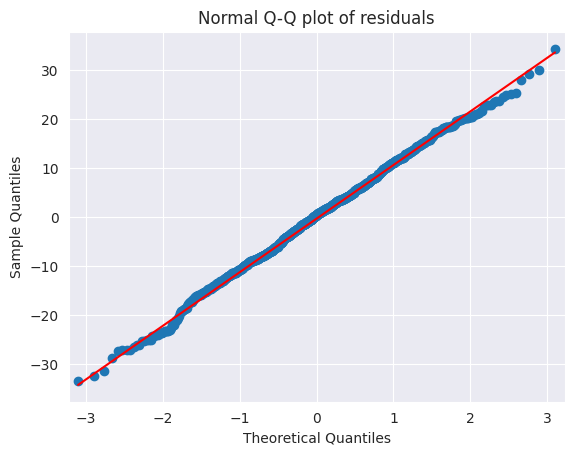

In [47]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [53]:
list(np.where(model.resid>30))

[array([381, 404])]

Residual Plot for Homoscedasticity

In [50]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

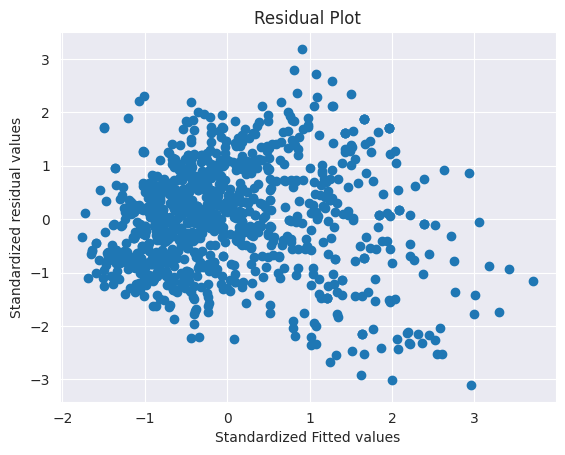

In [51]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

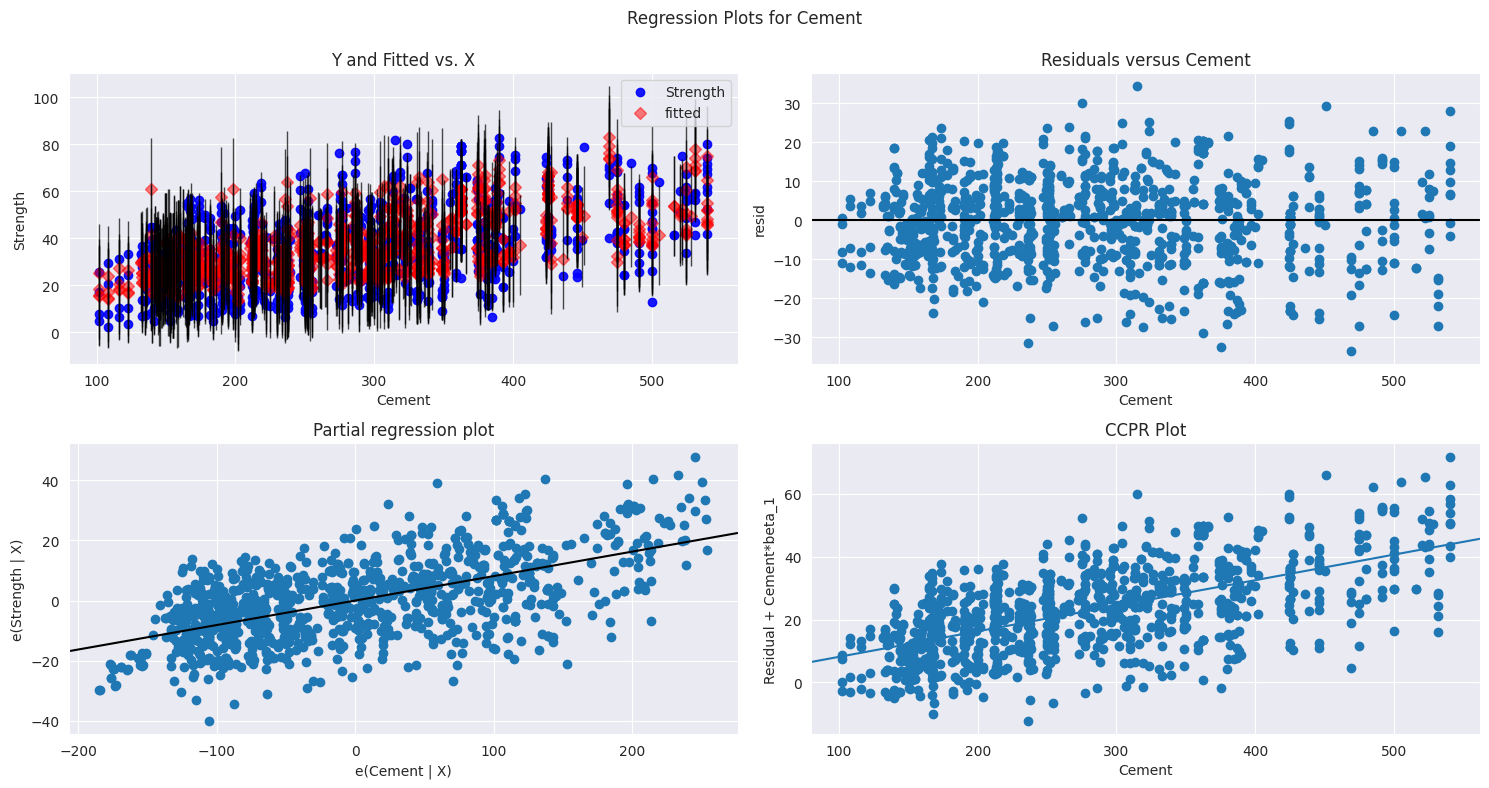

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Cement", fig=fig)
plt.show()

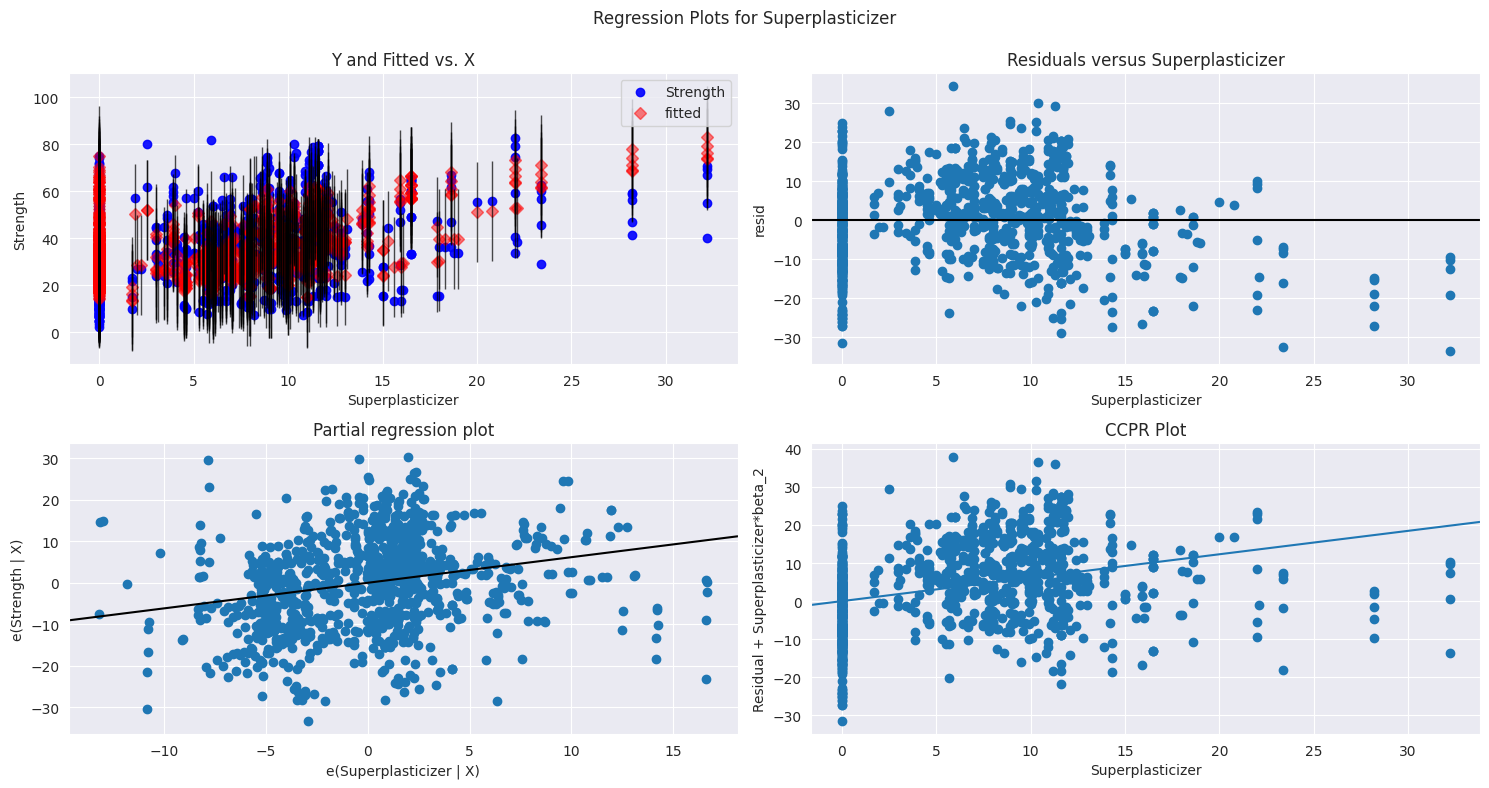

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Superplasticizer", fig=fig)
plt.show()

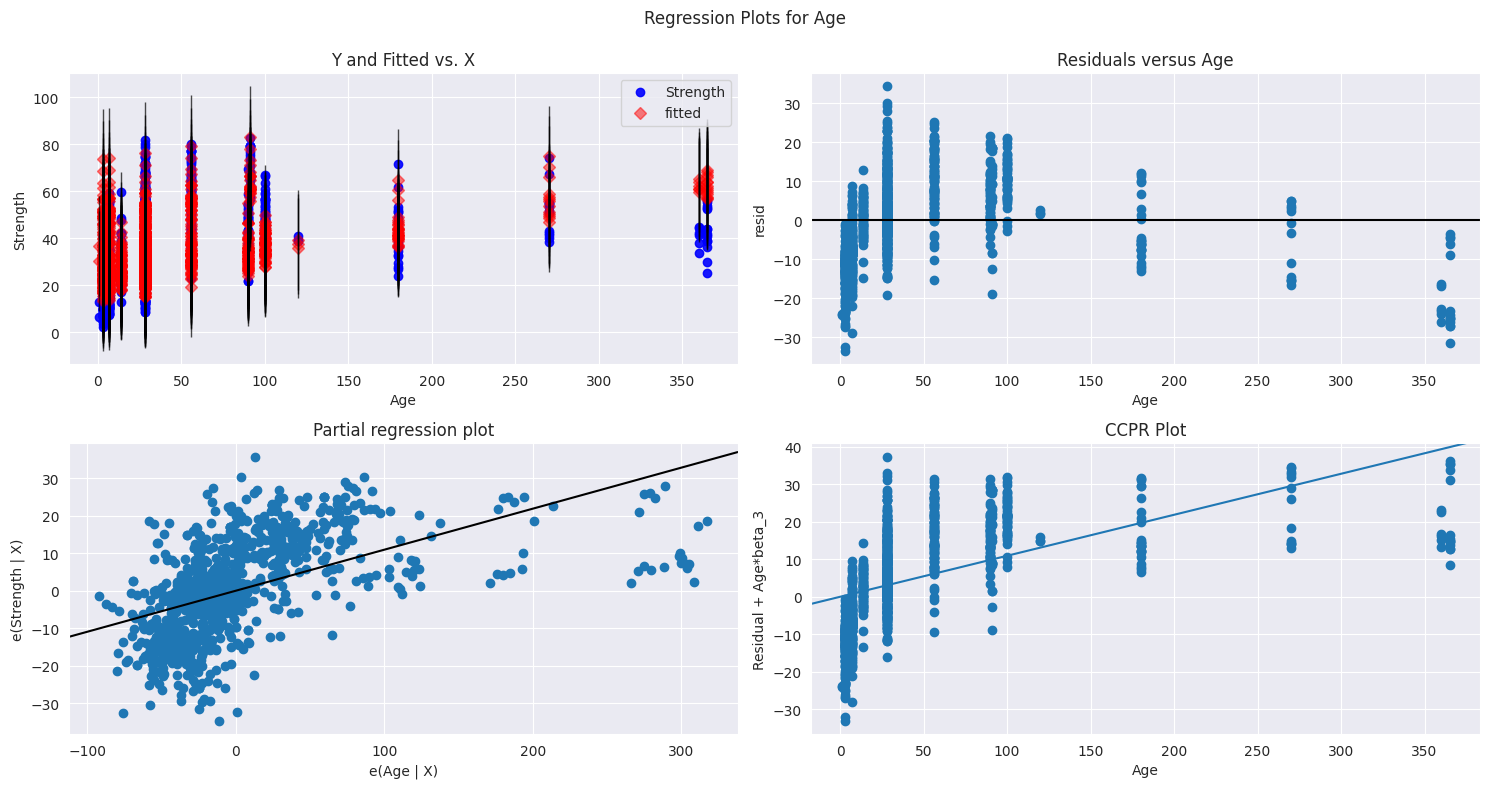

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

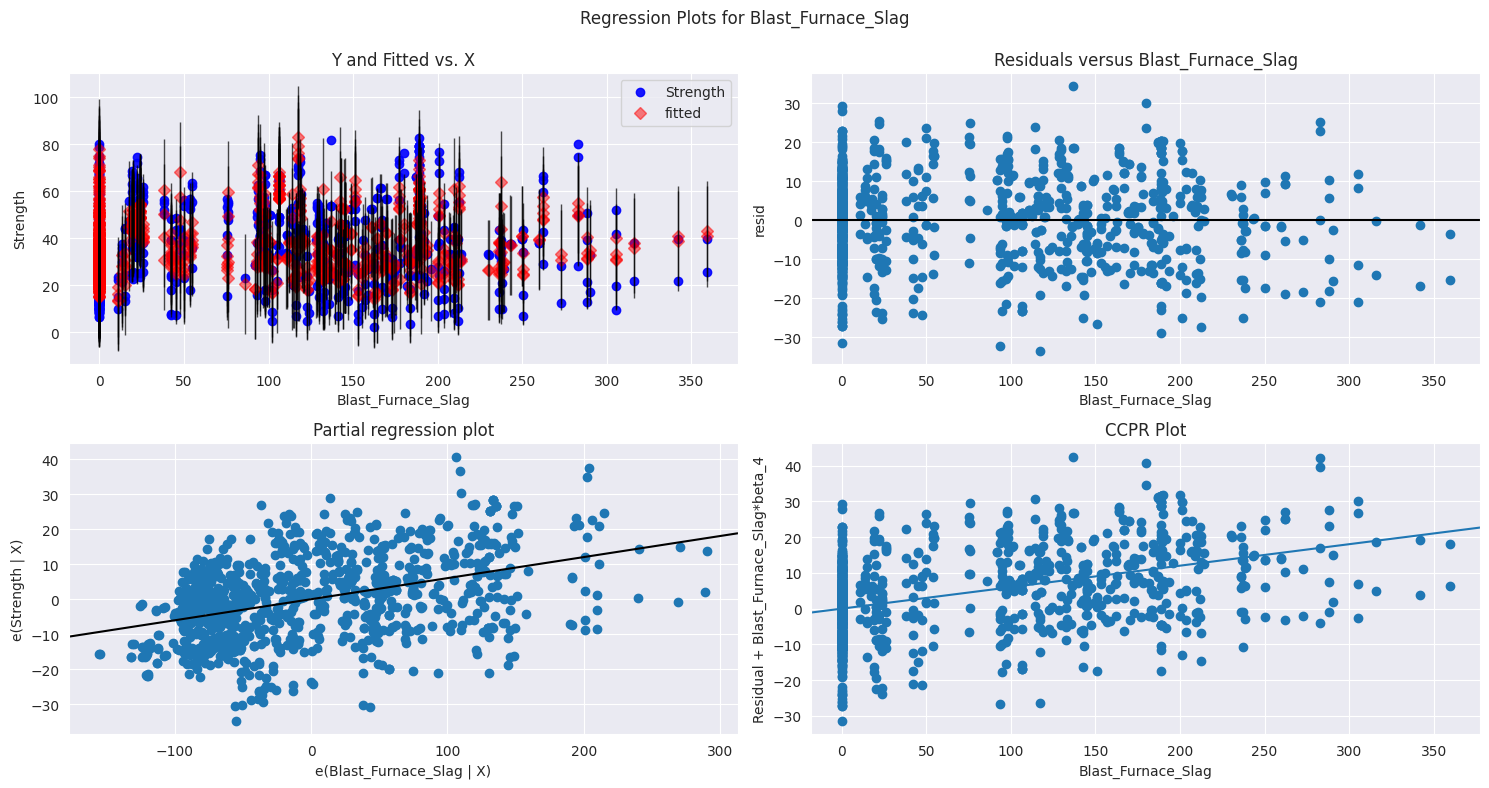

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Blast_Furnace_Slag", fig=fig)
plt.show()

# Model Deletion Diagnostics

Detecting Influencers/Outliers

# Cook’s Distance

In [58]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

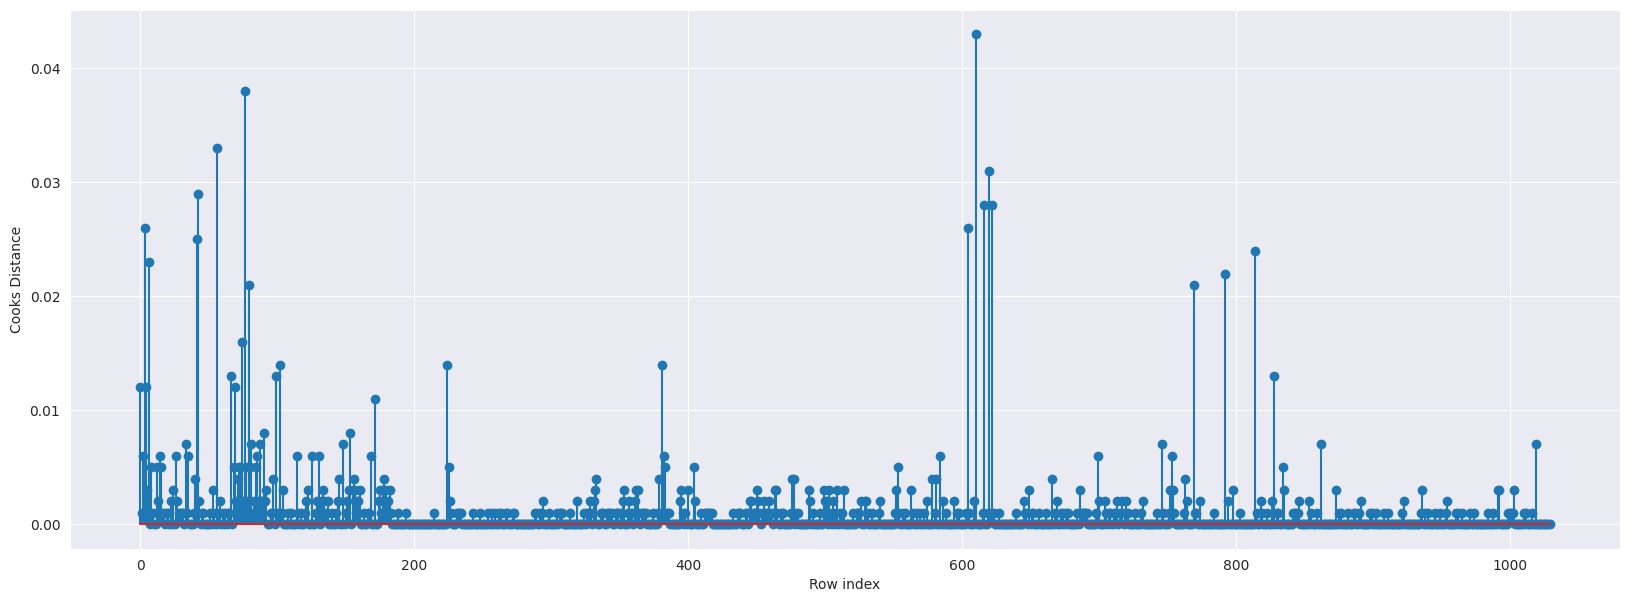

In [59]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(np.int64(610), np.float64(0.04275112012663288))

# High Influence Points

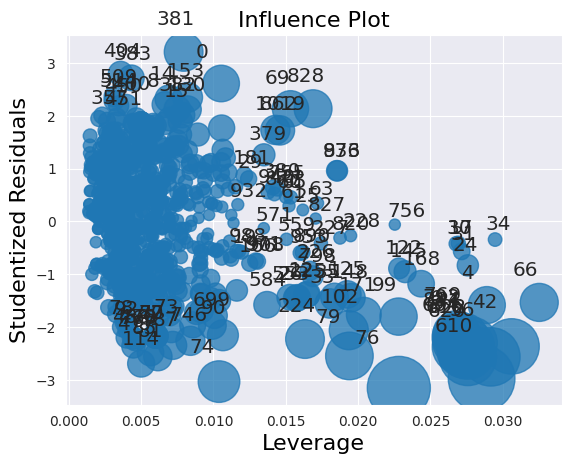

In [61]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [62]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

From the above plot, it is evident that data points 610,76,828 are the influencers

In [63]:
df[df.index.isin([76,610,828])]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.20
610,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,28,74.99


In [64]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Improving the Model

In [65]:
#Load the data
df_new = pd.read_csv("/content/concrete_data.csv")

In [66]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df_new.drop(df_new.index[[76,610,828]],axis=0).reset_index()

In [67]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [68]:
# Apply the same column name changes to df1 as were applied to df
df1.columns = df1.columns.str.replace(' ', '_')  # Replace spaces with underscores

In [69]:
df1

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1022,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1023,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1024,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1025,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# Build Model

In [70]:
#Exclude variable "Cement" and generate R-Squared and AIC values
final_ml_c= smf.ols('Strength~Superplasticizer+Age+Blast_Furnace_Slag',data = df).fit()

In [71]:
(final_ml_c.rsquared,final_ml_c.aic,final_ml_c.bic)

(np.float64(0.3176823518187797),
 np.float64(8336.735253968043),
 np.float64(8356.484510292938))

In [72]:
#Exclude variable "Superplasticizer" and generate R-Squared and AIC values
final_ml_s= smf.ols('Strength~Cement+Age+Blast_Furnace_Slag',data = df).fit()

In [73]:
(final_ml_s.rsquared,final_ml_s.aic,final_ml_s.bic)

(np.float64(0.41512631842691416),
 np.float64(8178.01285731465),
 np.float64(8197.762113639545))

In [75]:
#Exclude variable "Age" and generate R-Squared and AIC values
final_ml_a= smf.ols('Strength~Cement+Superplasticizer+Blast_Furnace_Slag',data = df).fit()

In [76]:
(final_ml_a.rsquared,final_ml_a.aic,final_ml_a.bic)

(np.float64(0.4189622465372692),
 np.float64(8171.235292413952),
 np.float64(8190.984548738847))

In [77]:
#Exclude variable "Blast_Furnace_Slag" and generate R-Squared and AIC values
final_ml_b= smf.ols('Strength~Cement+Superplasticizer+Age',data = df).fit()

In [78]:
(final_ml_b.rsquared,final_ml_b.aic,final_ml_b.bic)

(np.float64(0.48175382818386503),
 np.float64(8053.438960957688),
 np.float64(8073.188217282583))

Comparing above R-Square and AIC values, model 'final_ml_b' has high R- square and low AIC value hence include variable 'Cement' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [80]:
model_influence_b = final_ml_b.get_influence()
(c_b, _) = model_influence_b.cooks_distance

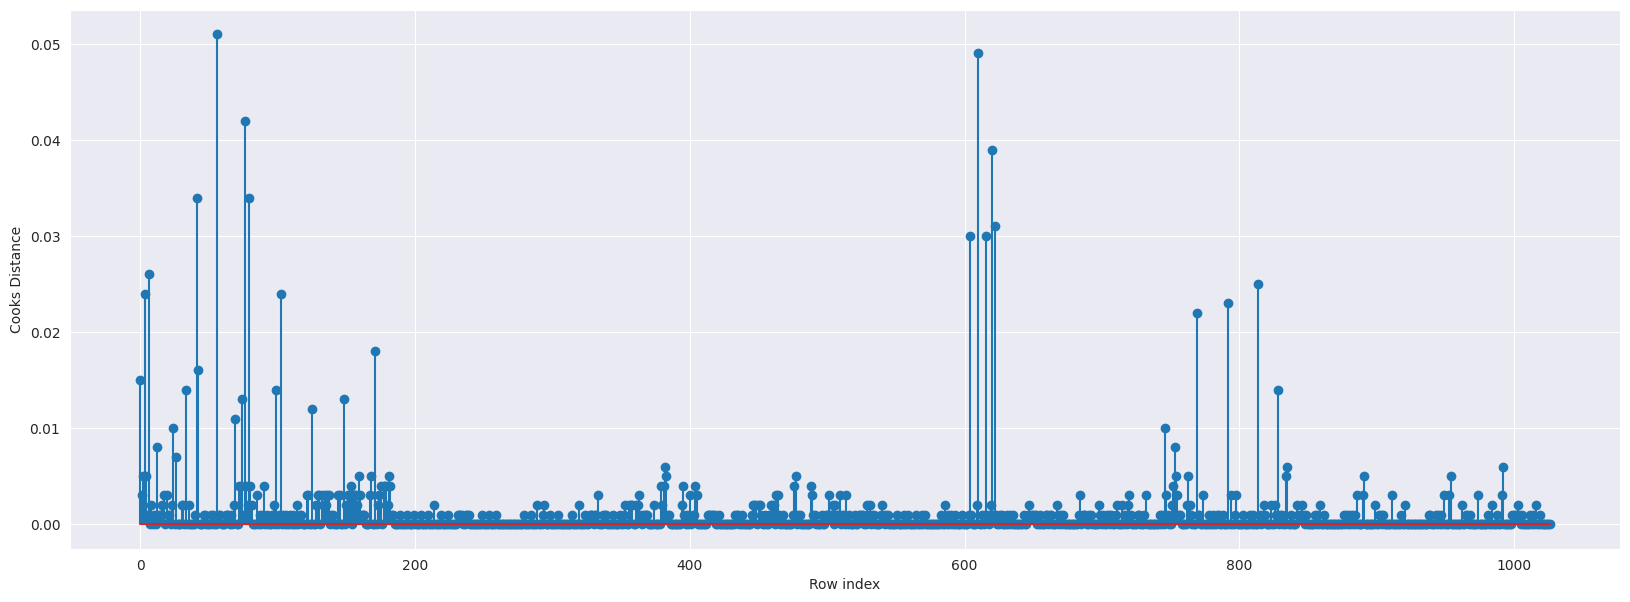

In [84]:
fig, ax = plt.subplots(figsize=(20, 7)) # Corrected line: fig, ax = plt.subplots(...)
ax.stem(np.arange(len(df1)), np.round(c_b[:len(df1)], 3)) # Slice c_b to match df1 length
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [85]:
#index of the data points where c is more than .05
(np.argmax(c_b),np.max(c_b))

(np.int64(56), np.float64(0.0507823140815596))

In [86]:
#Drop 56  observations
df2=df1.drop(df1.index[[56]],axis=0)

In [87]:
df2

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1022,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1023,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1024,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1025,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [88]:
#Reset the index and re arrange the row values
df3=df2.reset_index()

In [89]:
df4=df3.drop(['index'],axis=1)

In [90]:
df4

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1021,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1022,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1023,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1024,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [91]:
#Build the model on the new data
final_ml_b= smf.ols('Strength~Cement+Superplasticizer+Age',data = df4).fit()

In [92]:
#Again check for influencers
model_influence_b = final_ml_b.get_influence()
(c_b, _) = model_influence_b.cooks_distance

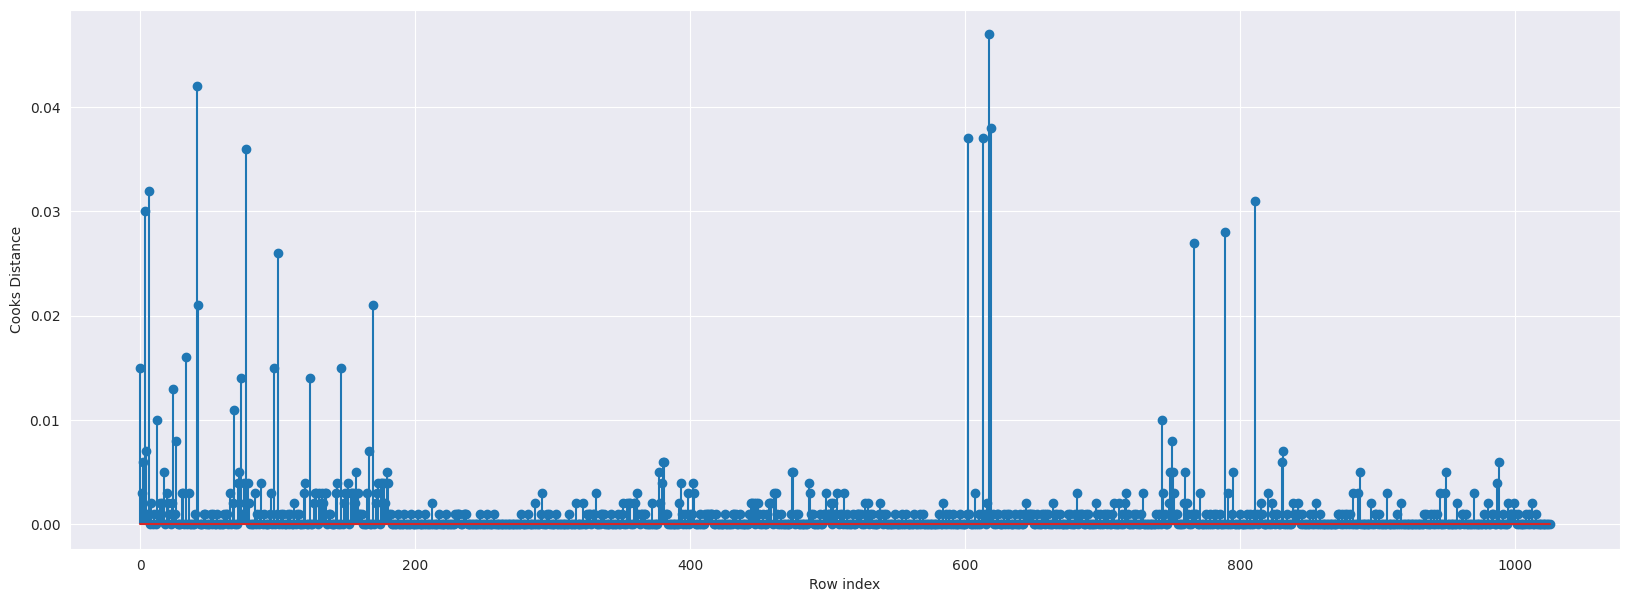

In [93]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_b,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [94]:
#index of the data points where c is more than .5
(np.argmax(c_b),np.max(c_b))

(np.int64(617), np.float64(0.04706190564206756))

ince the value is <1 , we can stop the diagnostic process and finalize the model

In [95]:
#Check the accuracy of the model
final_ml_b= smf.ols('Strength~Cement+Superplasticizer+Age',data = df4).fit()

In [96]:
(final_ml_b.rsquared,final_ml_b.aic)

(np.float64(0.4934897595875647), np.float64(7996.565700235534))

# Predicting for new data

In [98]:
#New data for prediction
new_data=pd.DataFrame({"Strength":89,"Cement":322,"Blast_Furnace_Slag":132,"Fly_Ash":108,"Water":200,"Superplasticizer":2.5,"Coarse_Aggregate":817,"Fine_Aggregate":780,"Age":28},index=[1])

In [99]:
final_ml_b.predict(new_data)

,0
1,32.637587


In [100]:
final_ml_b.predict(df_new.iloc[0:5,])

,0
0,47.627073
1,47.627073
2,55.537508
3,65.363860
4,55.639838


In [101]:
pred_y = final_ml_b.predict(df_new)

In [103]:
pred_y

,0
0,47.627073
1,47.627073
2,55.537508
3,65.363860
4,55.639838
...,...
1025,36.806846
1026,41.668046
1027,24.816761
1028,31.480655
